In [2]:
import h5py
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
import math

import seaborn as sns
import pandas as pd
from itertools import islice

import splat
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [3]:
#importing data
spectraldata = "/Users/malina/python_codes/spectral_templates_data_version_june20.h5"

pd.read_hdf(spectraldata, key = "binaries")

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [4]:
#defining locations

python_codes = '/Users/malina/python_codes/'
spectraldata = "spectral_templates_data_version_june20.h5"
singles = pd.read_hdf(python_codes + spectraldata , key='singles')
binaries = pd.read_hdf(python_codes + spectraldata, key = 'binaries')
wavelengths = pd.read_hdf(python_codes + spectraldata , key= 'wavegrid')

In [5]:
print(singles)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
1    0.634512  0.657556  0.714886  0.740784  0.703573  0.701638  0.724311   
2    0.493893  0.550069  0.571380  0.647315  0.666165  0.634119  0.608750   
3    0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
4    0.462815  0.535964  0.581080  0.607863  0.694902  0.748792  0.615324   
..        ...       ...       ...       ...       ...       ...       ...   
431 -0.004027 -0.007743 -0.004455  0.005451  0.001937 -0.002612  0.002762   
432  0.008489  0.009103 -0.001436  0.010861  0.008182  0.012516  0.011853   
433 -0.004778  0.078588  0.011728 -0.005535  0.033752  0.007601 -0.034531   
434  0.073008  0.009225 -0.005804 -0.039170 -0.014236 -0.015112  0.038132   
435  0.001837 -0.014860 -0.004494  0.012385 -0.003599 -0.001110  0.012853   

       flux_7    flux_8    flux_9  ...  flux_433  flux_434  flux_435  \
0  

In [5]:
df_singles = singles
df_binaries = binaries

# change column names

df_binaries = df_binaries.rename(columns = {'system_type':'spectral_type'})

In [6]:
# numerical classification

df_singles["binary"] = 0
df_binaries["binary"] = 1

In [7]:
# split singles data into spectral classification groups:

spectraltype = df_singles['spectral_type']

def draw_particularsingles(type1, type2):
    """Picks all single stars between and including type 1 and type 2"""
    certainsingles = df_singles[(spectraltype >= type1) & (spectraltype <= type2)]
    return certainsingles

# stars M6 to L0
df_singlesbetween16_20 = draw_particularsingles(16, 20)

# stars M9 to L5
df_singlesbetween19_25 = draw_particularsingles(19, 25)

# stars L4 to T0
df_singlesbetween24_30 = draw_particularsingles(24, 30)

# stars L9 to T5
df_singlesbetween29_35 = draw_particularsingles(29, 35)

# stars T5 and up
df_singlesabove_34 = df_singles[spectraltype > 34]


In [10]:
print(df_singlesbetween16_20)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
3    0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
5    0.367451  0.433453  0.462753  0.549918  0.618971  0.654281  0.611219   
7    0.520284  0.550723  0.566019  0.639142  0.627858  0.650451  0.624464   
10   0.548803  0.598948  0.644376  0.677643  0.683237  0.673407  0.674122   
..        ...       ...       ...       ...       ...       ...       ...   
107  0.152701  0.163243  0.187156  0.209427  0.239345  0.247006  0.273138   
110  0.172409  0.188480  0.204067  0.248013  0.255223  0.278031  0.297382   
111  0.154282  0.184225  0.229224  0.262484  0.295354  0.308843  0.311912   
115  0.160461  0.189007  0.223995  0.256795  0.284883  0.284397  0.282997   
129  0.104720  0.123388  0.139248  0.151517  0.161668  0.184953  0.201725   

       flux_7    flux_8    flux_9  ...  flux_434  flux_435  flux_436  \
0  

In [8]:
# creating the flux matrices

df_binaryflux = df_binaries.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1)

df_singlesflux = df_singles.drop('object_name', axis = 1).drop('spectral_type', axis = 1)

In [9]:
# creating flux matrices split by spectral type

df_singlesfluxfrom16_20 = df_singlesbetween16_20.drop('object_name', axis = 1).drop('spectral_type', axis = 1).drop('binary', axis = 1)

df_singlesfluxfrom19_25 = df_singlesbetween19_25.drop('object_name', axis = 1).drop('spectral_type', axis = 1).drop('binary', axis = 1)

df_singlesfluxfrom24_30 = df_singlesbetween24_30.drop('object_name', axis = 1).drop('spectral_type', axis = 1).drop('binary', axis = 1)

df_singlesfluxfrom29_35 = df_singlesbetween29_35.drop('object_name', axis = 1).drop('spectral_type', axis = 1).drop('binary', axis = 1)

df_singlesfluxabove_34 = df_singlesabove_34.drop('object_name', axis = 1).drop('spectral_type', axis = 1).drop('binary', axis = 1)


<AxesSubplot:>

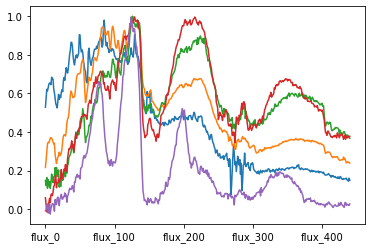

In [13]:
# check the singles spectra:

row_single1 = df_singlesfluxfrom16_20.iloc[1]
row_single1.plot()

row_single2 = df_singlesfluxfrom19_25.iloc[1]
row_single2.plot()

row_single3 = df_singlesfluxfrom24_30.iloc[1]
row_single3.plot()

row_single4 = df_singlesfluxfrom29_35.iloc[1]
row_single4.plot()

row_single5 = df_singlesfluxabove_34.iloc[1]
row_single5.plot()


In [10]:
# split binaries data into spectral classification groups based on system type:

systemtype = df_binaries['spectral_type']

def draw_particularbinaries_bysystem(type1, type2):
    """Draws all binaries in a dataset with system type between type 1 and type 2"""
    certainbinaries = df_binaries[(systemtype >= type1) & (systemtype <= type2)]
    return certainbinaries

binariesbetween16_20 = draw_particularbinaries_bysystem(16, 20)

binariesbetween19_25 = draw_particularbinaries_bysystem(19, 25)

binariesbetween24_30 = draw_particularbinaries_bysystem(24, 30)

binariesbetween29_35 = draw_particularbinaries_bysystem(29, 35)

binariesabove_34 = df_binaries[systemtype > 34]


In [11]:
# split binaries data into spectral classification groups based on primary and secondary type:

primarytype = df_binaries['primary_type']
secondarytype = df_binaries['secondary_type']

def draw_particularbinaries_bystar(type1, type2):
    """Draws all binaries from the data set that has both stars in between type 1 and type 2"""
    certainbinaries2 = df_binaries[(primarytype >= type1) & (primarytype <= type2) & (secondarytype >= type1) & (secondarytype <= type2)]
    return certainbinaries2

df_bothtypesbetween16_20 = draw_particularbinaries_bystar(16, 20)

df_bothtypesbetween19_25 = draw_particularbinaries_bystar(19, 25)

df_bothtypesbetween24_30 = draw_particularbinaries_bystar(24, 30)

df_bothtypesbetween29_35 = draw_particularbinaries_bystar(29, 35)

df_bothtypesabove_34 = df_binaries[(primarytype > 34) & (secondarytype > 34)]

In [16]:
print(df_bothtypesbetween16_20)

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0      0.568345  0.615487  0.668477  0.705189  0.698754  0.700950  0.717146   
1      0.496365  0.563067  0.602393  0.659527  0.682808  0.676481  0.674343   
2      0.520227  0.580531  0.627045  0.645281  0.665795  0.678923  0.686509   
3      0.483774  0.556865  0.603915  0.641451  0.698212  0.728678  0.666010   
4      0.434787  0.504214  0.543165  0.611378  0.659270  0.680497  0.663214   
...         ...       ...       ...       ...       ...       ...       ...   
40766  0.142611  0.168188  0.206003  0.248513  0.269593  0.279237  0.303306   
40770  0.141950  0.165722  0.196311  0.241143  0.256484  0.257963  0.285687   
43738  0.143906  0.174046  0.211263  0.247163  0.271881  0.280388  0.289250   
43742  0.160275  0.190611  0.223766  0.256830  0.279147  0.284423  0.284115   
46290  0.160384  0.189402  0.223895  0.256760  0.283308  0.284355  0.283245   

         flux_7    flux_8    flux_9  ...  flux_435 

In [12]:
# creating flux matrices split by primary and secondary type

df_binaryfluxfrom16_20 = df_bothtypesbetween16_20.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1).drop('binary', axis = 1)
print(df_binaryfluxfrom16_20)

df_binaryfluxfrom19_25 = df_bothtypesbetween19_25.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1).drop('binary', axis = 1)

df_binaryfluxfrom24_30 = df_bothtypesbetween24_30.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1).drop('binary', axis = 1)

df_binaryfluxfrom29_35 = df_bothtypesbetween29_35.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1).drop('binary', axis = 1)

df_binaryfluxabove_34 = df_bothtypesabove_34.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1).drop('binary', axis = 1)


         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0      0.568345  0.615487  0.668477  0.705189  0.698754  0.700950  0.717146   
1      0.496365  0.563067  0.602393  0.659527  0.682808  0.676481  0.674343   
2      0.520227  0.580531  0.627045  0.645281  0.665795  0.678923  0.686509   
3      0.483774  0.556865  0.603915  0.641451  0.698212  0.728678  0.666010   
4      0.434787  0.504214  0.543165  0.611378  0.659270  0.680497  0.663214   
...         ...       ...       ...       ...       ...       ...       ...   
40766  0.142611  0.168188  0.206003  0.248513  0.269593  0.279237  0.303306   
40770  0.141950  0.165722  0.196311  0.241143  0.256484  0.257963  0.285687   
43738  0.143906  0.174046  0.211263  0.247163  0.271881  0.280388  0.289250   
43742  0.160275  0.190611  0.223766  0.256830  0.279147  0.284423  0.284115   
46290  0.160384  0.189402  0.223895  0.256760  0.283308  0.284355  0.283245   

         flux_7    flux_8    flux_9  ...  flux_431 

<AxesSubplot:>

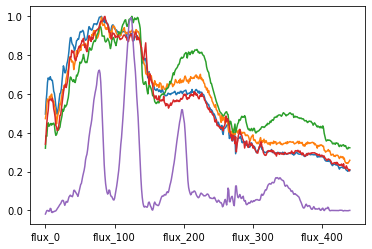

In [18]:
# check the spectra:

row_binary1 = df_binaryfluxfrom16_20.iloc[1]
row_binary1.plot()

row_binary2 = df_binaryfluxfrom19_25.iloc[1]
row_binary2.plot()

row_binary3 = df_binaryfluxfrom24_30.iloc[1]
row_binary3.plot()

row_binary4 = df_binaryfluxfrom29_35.iloc[1]
row_binary4.plot()

row_binary5 = df_binaryfluxabove_34.iloc[1]
row_binary5.plot()


In [20]:
# creating a random forest with no noise (yet)

frames1 = [df_singlesbetween16_20, df_bothtypesbetween16_20]
result1 = pd.concat(frames1)

RSEED = 42  

shuffled = result1.sample(frac=1)

feats = list(shuffled.columns)
feats.remove('object_name')
feats.remove('primary_type')
feats.remove('secondary_type')

x0 = np.array(shuffled[feats])
y0 = np.array(shuffled['binary'])

x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [21]:
# finding the precision

test_preds = RF.predict(x_test)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.9779 !


In [22]:
# classification report

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      0.26      0.41        27
           1       0.98      1.00      0.99       883

    accuracy                           0.98       910
   macro avg       0.99      0.63      0.70       910
weighted avg       0.98      0.98      0.97       910



In [23]:
# confusion matrix

confusion_matrix(y_test, test_preds)

array([[  7,  20],
       [  0, 883]])

In [13]:
# function that can add noise from 0.02 to 0.05 to any dataframe

def add_noise(df):
    """Adds noise between 2 and 5 percent to the binary dataset for any flux matrix"""
    n1, n2 = 0, random.uniform(0.02, 0.05)
    noisefunc = np.random.normal(n1, n2, [len(df), 441]) 
    noisyfluxfunc = df + noisefunc
    return noisyfluxfunc
    

In [28]:
# creating multiple noise matrices and concatenating them to achieve ~100,000 rows

my_list = []

for i in range(28):
    matrix1 = add_noise(df_binaryfluxfrom16_20)
    my_list.append(matrix1)
    
df_fullnoisybinaryflux16_20 = pd.concat(my_list)
print(df_fullnoisybinaryflux16_20)


         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0      0.589226  0.617851  0.690949  0.722692  0.726172  0.698952  0.688111   
1      0.488738  0.571267  0.637006  0.669595  0.685932  0.671463  0.648042   
2      0.534384  0.581612  0.653933  0.675219  0.658679  0.685204  0.694104   
3      0.486575  0.600866  0.583156  0.629663  0.681278  0.716972  0.691161   
4      0.434242  0.509846  0.527971  0.602897  0.680079  0.686513  0.668592   
...         ...       ...       ...       ...       ...       ...       ...   
40766  0.181456  0.141115  0.261217  0.347914  0.262427  0.334477  0.331949   
40770  0.107870  0.164701  0.176426  0.212680  0.209366  0.225915  0.277438   
43738  0.062632  0.217289  0.178659  0.266808  0.269896  0.314239  0.282797   
43742  0.186692  0.169203  0.148129  0.162483  0.332234  0.276968  0.248771   
46290  0.099117  0.213195  0.308627  0.214527  0.294769  0.324195  0.235868   

         flux_7    flux_8    flux_9  ...  flux_431 

In [29]:
# adding noise to singles

my_list = []

for i in range(1098):
    matrix1 = add_noise(df_singlesfluxfrom16_20)
    my_list.append(matrix1)
    
df_fullnoisysinglesflux16_20 = pd.concat(my_list)
print(df_fullnoisysinglesflux16_20)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.485099  0.578311  0.634003  0.616598  0.684213  0.681734  0.699632   
3    0.533708  0.560866  0.633312  0.588961  0.605621  0.631873  0.636830   
5    0.359825  0.446046  0.474295  0.552938  0.615052  0.661530  0.599616   
7    0.485122  0.524748  0.604627  0.641186  0.642773  0.652455  0.629993   
10   0.574639  0.611639  0.625166  0.651039  0.694170  0.680402  0.645694   
..        ...       ...       ...       ...       ...       ...       ...   
107  0.154790  0.139993  0.200873  0.216866  0.222343  0.253779  0.268245   
110  0.220287  0.244997  0.223211  0.286634  0.200977  0.257032  0.238582   
111  0.152177  0.189953  0.192617  0.286466  0.267817  0.310837  0.360552   
115  0.158576  0.244637  0.174582  0.244702  0.291489  0.330323  0.324820   
129  0.142789  0.203792  0.186349  0.200239  0.199111  0.126893  0.155389   

       flux_7    flux_8    flux_9  ...  flux_431  flux_432  flux_433  \
0  

In [30]:
df_fullnoisybinaryflux16_20["binary"] = 1
print(df_fullnoisybinaryflux16_20)

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0      0.589226  0.617851  0.690949  0.722692  0.726172  0.698952  0.688111   
1      0.488738  0.571267  0.637006  0.669595  0.685932  0.671463  0.648042   
2      0.534384  0.581612  0.653933  0.675219  0.658679  0.685204  0.694104   
3      0.486575  0.600866  0.583156  0.629663  0.681278  0.716972  0.691161   
4      0.434242  0.509846  0.527971  0.602897  0.680079  0.686513  0.668592   
...         ...       ...       ...       ...       ...       ...       ...   
40766  0.181456  0.141115  0.261217  0.347914  0.262427  0.334477  0.331949   
40770  0.107870  0.164701  0.176426  0.212680  0.209366  0.225915  0.277438   
43738  0.062632  0.217289  0.178659  0.266808  0.269896  0.314239  0.282797   
43742  0.186692  0.169203  0.148129  0.162483  0.332234  0.276968  0.248771   
46290  0.099117  0.213195  0.308627  0.214527  0.294769  0.324195  0.235868   

         flux_7    flux_8    flux_9  ...  flux_432 

In [31]:
df_fullnoisysinglesflux16_20["binary"] = 0
print(df_fullnoisysinglesflux16_20)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.485099  0.578311  0.634003  0.616598  0.684213  0.681734  0.699632   
3    0.533708  0.560866  0.633312  0.588961  0.605621  0.631873  0.636830   
5    0.359825  0.446046  0.474295  0.552938  0.615052  0.661530  0.599616   
7    0.485122  0.524748  0.604627  0.641186  0.642773  0.652455  0.629993   
10   0.574639  0.611639  0.625166  0.651039  0.694170  0.680402  0.645694   
..        ...       ...       ...       ...       ...       ...       ...   
107  0.154790  0.139993  0.200873  0.216866  0.222343  0.253779  0.268245   
110  0.220287  0.244997  0.223211  0.286634  0.200977  0.257032  0.238582   
111  0.152177  0.189953  0.192617  0.286466  0.267817  0.310837  0.360552   
115  0.158576  0.244637  0.174582  0.244702  0.291489  0.330323  0.324820   
129  0.142789  0.203792  0.186349  0.200239  0.199111  0.126893  0.155389   

       flux_7    flux_8    flux_9  ...  flux_432  flux_433  flux_434  \
0  

In [32]:
frames2 = [df_fullnoisysinglesflux16_20, df_fullnoisybinaryflux16_20]
result2 = pd.concat(frames2)
print(result2)

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0      0.485099  0.578311  0.634003  0.616598  0.684213  0.681734  0.699632   
3      0.533708  0.560866  0.633312  0.588961  0.605621  0.631873  0.636830   
5      0.359825  0.446046  0.474295  0.552938  0.615052  0.661530  0.599616   
7      0.485122  0.524748  0.604627  0.641186  0.642773  0.652455  0.629993   
10     0.574639  0.611639  0.625166  0.651039  0.694170  0.680402  0.645694   
...         ...       ...       ...       ...       ...       ...       ...   
40766  0.181456  0.141115  0.261217  0.347914  0.262427  0.334477  0.331949   
40770  0.107870  0.164701  0.176426  0.212680  0.209366  0.225915  0.277438   
43738  0.062632  0.217289  0.178659  0.266808  0.269896  0.314239  0.282797   
43742  0.186692  0.169203  0.148129  0.162483  0.332234  0.276968  0.248771   
46290  0.099117  0.213195  0.308627  0.214527  0.294769  0.324195  0.235868   

         flux_7    flux_8    flux_9  ...  flux_432 

In [33]:
RSEED = 42  

shuffled = result2.sample(frac=1)
print(shuffled)

feats = list(shuffled.columns)

x0 = np.array(shuffled[feats])
y0 = np.array(shuffled['binary'])

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
91     0.141068  0.211329  0.152226  0.127255  0.206954  0.252338  0.300255   
4263   0.276658  0.357459  0.403192  0.434811  0.460588  0.479802  0.585454   
7434   0.464530  0.567409  0.534289  0.645396  0.677016  0.653676  0.668562   
12393  0.384273  0.463244  0.508291  0.582297  0.575313  0.539932  0.560659   
90     0.220649  0.141741  0.180990  0.187304  0.273577  0.296695  0.315153   
...         ...       ...       ...       ...       ...       ...       ...   
13284  0.351722  0.398709  0.409391  0.482459  0.517027  0.513681  0.562985   
23668  0.081561  0.207496  0.249034  0.214100  0.253121  0.275040  0.356584   
47     0.229147  0.227792  0.285425  0.337661  0.387525  0.410527  0.364816   
101    0.139717  0.166769  0.208836  0.233669  0.263226  0.221446  0.296851   
7      0.461072  0.514550  0.547110  0.625595  0.609818  0.699570  0.636233   

         flux_7    flux_8    flux_9  ...  flux_432 

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

In [35]:
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [36]:
from sklearn.metrics import precision_score

test_preds = RF.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~1.0000 !


In [37]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24939
           1       1.00      1.00      1.00     24884

    accuracy                           1.00     49823
   macro avg       1.00      1.00      1.00     49823
weighted avg       1.00      1.00      1.00     49823



In [38]:
confusion_matrix(y_test, test_preds)

array([[24939,     0],
       [    4, 24880]])

In [39]:
# creating noise for classes between 19 and 25
my_list_1 = []

for i in range(18):
    matrix1 = add_noise(df_binaryfluxfrom19_25)
    my_list_1.append(matrix1)
    
df_fullnoisybinaryflux19_25 = pd.concat(my_list_1)
print(df_fullnoisybinaryflux19_25)

my_list_2 = []

for i in range(750):
    matrix1 = add_noise(df_singlesfluxfrom19_25)
    my_list_2.append(matrix1)
    
df_fullnoisysinglesflux19_25 = pd.concat(my_list_2)
print(df_fullnoisysinglesflux19_25)

df_fullnoisysinglesflux19_25['binary'] = 0
df_fullnoisybinaryflux19_25['binary'] = 1

         flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
541    0.340779  0.356389  0.376201  0.399301  0.386134  0.477345  0.457931   
563    0.450104  0.491369  0.526194  0.556525  0.559841  0.593807  0.592639   
1599   0.568904  0.563818  0.618411  0.594144  0.613016  0.677199  0.663607   
3811   0.386809  0.414234  0.479431  0.552857  0.563678  0.544522  0.523155   
7950   0.196891  0.224394  0.240905  0.247488  0.307973  0.344706  0.334676   
...         ...       ...       ...       ...       ...       ...       ...   
88448  0.140486  0.092411  0.079680  0.126617  0.141542  0.104835  0.202188   
89288  0.129329  0.102058  0.178901  0.156763  0.112733  0.090895  0.082309   
89298  0.114976  0.109563  0.142399  0.124038  0.198933  0.136136  0.150467   
90533  0.066892  0.159007  0.140724  0.133873  0.151783  0.137628  0.188588   
94617  0.121177  0.200394  0.134124  0.170643  0.081520  0.191011  0.198530   

         flux_7    flux_8    flux_9  ...  flux_431 

In [40]:
# creating random forest for classes between 19 and 25

frames3 = [df_fullnoisysinglesflux19_25, df_fullnoisybinaryflux19_25]
result3 = pd.concat(frames3)

RSEED = 42  

shuffled = result3.sample(frac=1)

feats = list(shuffled.columns)

x0 = np.array(shuffled[feats])
y0 = np.array(shuffled['binary'])

x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [41]:
# finding the precision

test_preds = RF.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

print(classification_report(y_test, test_preds))

confusion_matrix(y_test, test_preds)

The raw features produce a model with precision ~1.0000 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24411
           1       1.00      1.00      1.00     24903

    accuracy                           1.00     49314
   macro avg       1.00      1.00      1.00     49314
weighted avg       1.00      1.00      1.00     49314



array([[24411,     0],
       [   18, 24885]])

In [42]:
# creating noise for classes between 24 and 30
my_list_3 = []

for i in range(18):
    matrix1 = add_noise(df_binaryfluxfrom24_30)
    my_list_3.append(matrix1)
    
df_fullnoisybinaryflux24_30 = pd.concat(my_list_3)
print(df_fullnoisybinaryflux24_30)

my_list_4 = []

for i in range(750):
    matrix1 = add_noise(df_singlesfluxfrom24_30)
    my_list_4.append(matrix1)
    
df_fullnoisysinglesflux24_30 = pd.concat(my_list_4)
print(df_fullnoisysinglesflux24_30)

df_fullnoisysinglesflux24_30['binary'] = 0
df_fullnoisybinaryflux24_30['binary'] = 1

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
253     0.135767  0.295947  0.386980  0.334822  0.293973  0.373203  0.346705   
265     0.343835  0.409275  0.375690  0.438202  0.491644  0.422062  0.458213   
9375    0.244453  0.301836  0.332112  0.321106  0.355484  0.350815  0.361649   
10752   0.186938  0.228523  0.206249  0.225761  0.192820  0.289229  0.262730   
10802   0.224093  0.207708  0.172617  0.228910  0.229450  0.300118  0.281955   
...          ...       ...       ...       ...       ...       ...       ...   
100754  0.020287  0.041900  0.064125  0.068842  0.097444  0.096743 -0.055522   
100757  0.023857 -0.078751 -0.082242 -0.042179 -0.003347  0.079207  0.040651   
101477  0.037161  0.008407  0.039533  0.049982  0.057905  0.044077 -0.024581   
101491  0.005283  0.039011  0.059641  0.082557  0.111076  0.070185  0.036564   
101911  0.012358 -0.054532 -0.002703  0.019565  0.004904  0.051888 -0.002704   

          flux_7    flux_8    flux_9  .

In [43]:
# creating random forest for classes between 24 and 30

frames4 = [df_fullnoisysinglesflux24_30, df_fullnoisybinaryflux24_30]
result4 = pd.concat(frames4)

RSEED = 42  

shuffled = result4.sample(frac=1)

feats = list(shuffled.columns)

x0 = np.array(shuffled[feats])
y0 = np.array(shuffled['binary'])

x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [44]:
# finding the precision

test_preds = RF.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

print(classification_report(y_test, test_preds))

confusion_matrix(y_test, test_preds)

The raw features produce a model with precision ~1.0000 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26039
           1       1.00      1.00      1.00     26934

    accuracy                           1.00     52973
   macro avg       1.00      1.00      1.00     52973
weighted avg       1.00      1.00      1.00     52973



array([[26039,     0],
       [    3, 26931]])

In [14]:
# creating noise for classes between 29 and 35
my_list_5 = []

for i in range(24):
    matrix1 = add_noise(df_binaryfluxfrom29_35)
    my_list_5.append(matrix1)
    
df_fullnoisybinaryflux29_35 = pd.concat(my_list_5)
print(df_fullnoisybinaryflux29_35)

my_list_6 = []

for i in range(900):
    matrix1 = add_noise(df_singlesfluxfrom29_35)
    my_list_6.append(matrix1)
    
df_fullnoisysinglesflux29_35 = pd.concat(my_list_6)
print(df_fullnoisysinglesflux29_35)

df_fullnoisysinglesflux29_35['binary'] = 0
df_fullnoisybinaryflux29_35['binary'] = 1

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
4045    0.271014  0.308437  0.354931  0.362915  0.330449  0.370450  0.357989   
4502    0.342375  0.417788  0.450896  0.482013  0.534792  0.591753  0.565169   
6783    0.570814  0.628736  0.684135  0.706409  0.702676  0.712406  0.720471   
9060    0.280782  0.263475  0.332593  0.335463  0.355335  0.386082  0.399440   
9521    0.226103  0.265727  0.268370  0.271445  0.294859  0.298587  0.334451   
...          ...       ...       ...       ...       ...       ...       ...   
107812  0.012738  0.012723 -0.016821  0.000959  0.039258  0.018244  0.065931   
107813  0.038150  0.053239  0.061118  0.039225  0.033667 -0.002786  0.054308   
108472  0.068022  0.049269 -0.009537  0.062447  0.042412  0.055134  0.007629   
108473  0.059698  0.061641  0.025649  0.021438 -0.004038  0.089399 -0.000233   
108853  0.005362 -0.040969  0.024595  0.030457 -0.035072  0.022473  0.019271   

          flux_7    flux_8    flux_9  .

In [15]:
# creating random forest for classes between 29 and 35

frames5 = [df_fullnoisysinglesflux29_35, df_fullnoisybinaryflux29_35]
result5 = pd.concat(frames5)

RSEED = 42  

shuffled = result5.sample(frac=1)

feats = list(shuffled.columns)

x0 = np.array(shuffled[feats])
y0 = np.array(shuffled['binary'])

x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [16]:
# finding the precision

test_preds = RF.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

print(classification_report(y_test, test_preds))

confusion_matrix(y_test, test_preds)

The raw features produce a model with precision ~1.0000 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25402
           1       1.00      1.00      1.00     25907

    accuracy                           1.00     51309
   macro avg       1.00      1.00      1.00     51309
weighted avg       1.00      1.00      1.00     51309



array([[25402,     0],
       [   21, 25886]])

In [20]:
# creating noise for classes 35 and above
my_list_7 = []

for i in range(50):
    matrix1 = add_noise(df_binaryfluxabove_34)
    my_list_7.append(matrix1)
    
df_fullnoisybinaryfluxabove_34 = pd.concat(my_list_7)
print(df_fullnoisybinaryfluxabove_34)

my_list_8 = []

for i in range(800):
    matrix1 = add_noise(df_singlesfluxabove_34)
    my_list_8.append(matrix1)
    
df_fullnoisysinglesfluxabove_34 = pd.concat(my_list_8)
print(df_fullnoisysinglesflux29_35)

df_fullnoisysinglesfluxabove_34['binary'] = 0
df_fullnoisybinaryfluxabove_34['binary'] = 1

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
845     0.075712  0.017377  0.069109  0.041650  0.086916  0.088662  0.149370   
10984  -0.022847  0.032762 -0.036976  0.036558  0.024537  0.033107 -0.012307   
12277   0.012402 -0.000060  0.013707  0.052431  0.053423  0.080412  0.093114   
12286  -0.000927 -0.018122 -0.012290 -0.015329 -0.006849 -0.028072 -0.030300   
12289  -0.060249  0.070898  0.006288  0.014413  0.030166  0.009386  0.121958   
...          ...       ...       ...       ...       ...       ...       ...   
110809  0.053844  0.026190  0.002233  0.013336 -0.048189  0.038036  0.041851   
110810  0.042582  0.019914  0.051202 -0.016264  0.042594  0.022557 -0.043403   
110848  0.036085 -0.012467 -0.037916  0.007340 -0.011301 -0.001461  0.052083   
110849 -0.009901 -0.054908  0.043590  0.011652  0.010612  0.023600 -0.012280   
110887  0.065513  0.041458  0.025273 -0.047040 -0.014964  0.025738  0.014614   

          flux_7    flux_8    flux_9  .

In [21]:
# creating random forest for classes above 34

frames6 = [df_fullnoisysinglesfluxabove_34, df_fullnoisybinaryfluxabove_34]
result6 = pd.concat(frames6)

RSEED = 42  

shuffled = result6.sample(frac=1)

feats = list(shuffled.columns)

x0 = np.array(shuffled[feats])
y0 = np.array(shuffled['binary'])

x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [22]:
# finding the precision

test_preds = RF.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

print(classification_report(y_test, test_preds))

confusion_matrix(y_test, test_preds)

The raw features produce a model with precision ~1.0000 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13771
           1       1.00      1.00      1.00     27342

    accuracy                           1.00     41113
   macro avg       1.00      1.00      1.00     41113
weighted avg       1.00      1.00      1.00     41113



array([[13771,     0],
       [    0, 27342]])